# Plot Trajectories
This is script will create a sample plot of trajectories calculated from "backwards_trajectories.ipynb". It contains two subplots: trajectories in the x-y and x-z plane.  

# Load Modules

In [32]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize

# Read in Trajectory Data

In [33]:
xpos = np.load('trajectory_arrays/xpos_fast.npy')
ypos = np.load('trajectory_arrays/ypos_fast.npy')
zpos = np.load('trajectory_arrays/zpos_fast.npy')
variable1 = np.load('trajectory_arrays/th_fast.npy')

# Read in Model Data for Domain Info

In [34]:
#Read in model data
ds = xr.open_dataset('/uufs/chpc.utah.edu/common/home/steenburgh-group8/tom/cm1/output/15ms_1500m_tug.nc')

#Horizontal resolution of model output (meters)
hor_resolution = (ds.xf[1].values-ds.xf[0].values)*1000

#Get surface height grid (set to zero if no terrain)
try:
    zs = np.array(ds.zs[0,:,:])
except:
    zs = np.zeros((ds.ny, ds.nx))  

# Plot Trajectories

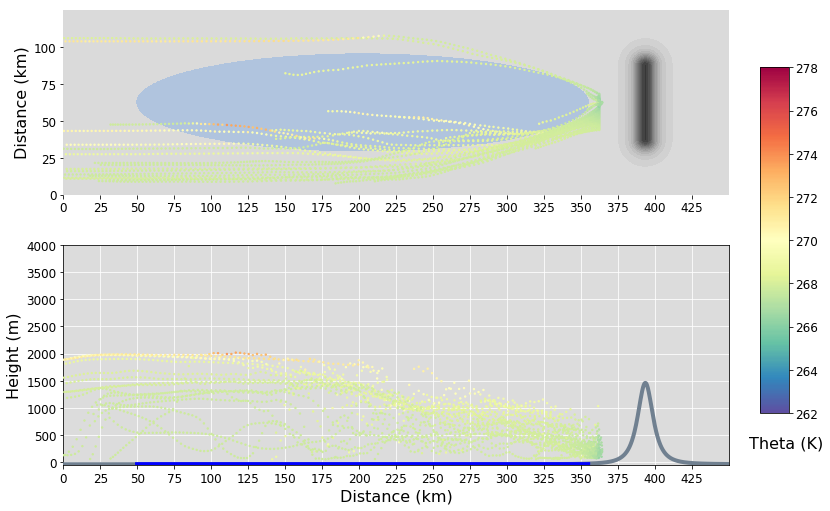

In [37]:
###############################################################################
###################  Backward Trajectory Plot  ################################
###############################################################################

%matplotlib inline
fig = plt.figure(figsize=(12,8), facecolor='w', edgecolor='k')

###################  Plot Trajectories in x-y plane ###############################

#Create Plot
ax = plt.subplot(211,aspect = 'equal') 
plt.subplots_adjust(left=0.1, bottom=0.11, right=0.87, top=0.93, wspace=0, hspace=0.15)

#Color range of Varible1 (set by user)
xlmin = 262
xlmax = 278.01
xlevels = np.arange(xlmin,xlmax, 0.05)
xlevels_ticks = np.arange(xlmin,xlmax,2)
xlevels_ticks_labels = np.arange(xlmin,xlmax, 2).astype(int)

#Plot trajectories in x-y plane, colored by Variable1
cmap = cm.Spectral_r
trajectories_xy = plt.scatter(xpos, ypos, c = variable1, cmap = cmap, norm=matplotlib.colors.BoundaryNorm(xlevels,cmap.N), s = 2, zorder = 7)

#Ticks and labels (set by user)
xticks = np.arange(0,ds.nx,200)
yticks = np.arange(0,ds.ny,200)
plt.xticks(xticks)
plt.yticks(yticks)
xtickslabs = (xticks*hor_resolution/1000).astype(int) #kilometers
ytickslabs = (yticks*hor_resolution/1000).astype(int) #kilometers
ax.set_xticklabels((xtickslabs), fontsize = 12)
ax.set_yticklabels((ytickslabs), fontsize = 12)
plt.ylabel('Distance (km)', fontsize = 16)

#Limits and characteristics (set by user)
plt.xlim(0,ds.nx)
plt.ylim(0,ds.ny)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

#Plot water and land (set by user)
levels_water = [1.5, 2.5]
levels_terrain = [0,1.5]
xland_plt = plt.contourf(ds.xland[0,:,:], levels_water, alpha = 1, colors = ('lightsteelblue'), zorder = 2)
xland_plt = plt.contourf(ds.xland[0,:,:], levels_terrain, alpha = 1, colors = ('gainsboro'), zorder = 1)

#Terrain (set by user)
terrain_levels = np.arange(-1, 2000.1, 100)
terrain = plt.contourf(zs[:,:], terrain_levels, alpha = 1, cmap = cm.Greys, vmin = -600, vmax = 2000, zorder = 1)



###################  Plot Trajectories in x-z plane ###############################

#Create subplot
ax = plt.subplot(212)

#Plot trajectories in x-z plane, colored by Variable1
trajectories_xz = plt.scatter(xpos, zpos, c = variable1, cmap = cmap, norm=matplotlib.colors.BoundaryNorm(xlevels,cmap.N), s = 2, zorder = 3)

#Ticks and labels (set by user)
xticks = np.arange(0,ds.nx,200)
yticks = np.arange(0,4001,500)
plt.xticks(xticks)
plt.yticks(yticks)
xtickslabs = (xticks*hor_resolution/1000).astype(int) #kilometers
ytickslabs = (yticks).astype(int) #meters
ax.set_xticklabels((xtickslabs), fontsize = 12)
ax.set_yticklabels((ytickslabs), fontsize = 12)
plt.ylabel('Height (m)', fontsize = 16)
plt.xlabel('Distance (km)', fontsize = 16)

#Limits and characteristics (set by user)
plt.xlim(0,ds.nx)
plt.ylim([-50,yticks[-1]])
plt.axvspan(0,ds.nx,color='gainsboro',lw=0)
plt.grid(True, color = 'white')

#Plot Terrain (set by user)
x1d = np.arange(0,ds.nx,1)
ymid = np.int(ds.ny/2)
terrain = plt.plot(x1d, zs[ymid,:]-40, c = 'slategrey', linewidth = 4, zorder = 4)

#Plot Lake (set by user)
lake = np.array(ds.xland[0,ymid,:])
lake[lake == 1] = np.nan
lake_plt = plt.plot(x1d, lake-40, c = 'blue', linewidth = 4, zorder = 5)

#Colorbar (set by user)
plt.text(1.03, 0.08,'Theta (K)', fontsize = 16, transform = ax.transAxes)
cax = fig.add_axes([0.005,0.2,1.06,0.6],visible=None)            
cbar = plt.colorbar(trajectories_xz, ax = cax, ticks = xlevels_ticks, orientation='vertical', aspect = 12)
cbar.ax.set_xticklabels(xlevels_ticks_labels)
cbar.ax.tick_params(labelsize=12)

#Save
plt.savefig("trajectory_plot.png", dpi = 300)